# Importing the Data 

In [15]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

with open('interactions.pickle', 'rb') as handle:
    my_dict = pickle.load(handle)

# Functionality 1 - Get the overall features of the graph

It takes in input:

* One of the 3 graphs

The output should return:

* Whether the graph is directed or not
* Number of users
* Number of answers/comments
* Average number of links per user
* Density degree of the graph
* Whether the graph is sparse or dense

#### 1.1 Graph is directed or not?

In [16]:
def directed_or_undirected_f(dict_to_search):
    '''
    If a vertex u has a edge that goes to vertex v, and v doesn't have a vertex that goes back to u, then the graph is directed. 
    We will prove this by checking the keys of our dictionary until we find the descripted situation. 
    '''
    is_directed = True # Suppose graph is directed until proven the contrary
    
    for each_key in dict_to_search.keys(): #for each key of the dictionary
        
        target_nodes = set(np.array(dict_to_search[each_key])[:,0])
        for each_adjacent_node in target_nodes:
            if(each_adjacent_node not in dict_to_search.keys()): #If the adjacent node is not in keys, then there's not edge going back
                is_directed = False
                return(is_directed)
            
            adjacent_nodes = set(np.array(dict_to_search[each_adjacent_node])[:,0])
            
            if(each_key not in adjacent_nodes):
                is_directed = False
                return(is_directed)
    return(is_directed)

In [18]:
def density_distri_plot(graph_to_analyze):
    '''
    Function to count the frequency of the number of outgoing edges in each key of the graph to then plot the degree distribution. 
    '''
    keys = dict_test_2.keys()
    list_density = []
    for each_key in keys:
        list_density.append(len(dict_test_2[each_key]))
    return list_density

#### 1.2 Number of users
We will implement **Depth First Search (DFS)** to count the number of users that the graph has. 

In [19]:
def number_of_users_f(dict_to_search):
    
    dict_keys = set(dict_to_search.keys())
    total_users = dict_keys
    
    for each_key in dict_keys.copy():
        target_nodes = set(np.array(dict_to_search[each_key])[:,0])
        difference = target_nodes.difference(total_users)
        total_users.update(difference)
    
    return(len(total_users))

#### 1.3 Number of answers/comments

#### 1.4 Average number of links per user

In [20]:
def outgoing_edges_f(dict_to_search):
    '''
    Function computes the total number of edges that exit from all the keys of the dictionary
    '''
    num_outgoing_edges = 0
    
    for each_key in dict_to_search.keys(): #Takes each key of the dictionary
        outgoing_edges = np.array(dict_to_search[each_key])[:,0] #Takes each target node for a particular source node
        num_outgoing_edges += len(outgoing_edges) #Increases the total number of outgoing edges by the total target nodes for a particular source node
    
    return(num_outgoing_edges)

In [21]:
def avg_num_links_f(num_of_users,num_of_edges):
    '''
    Function compues the average number of links per user by dividing the total number of edges of the dictionaty by the total number of users
    '''
    #num_outgoing_edges = outgoing_edges_f(dict_to_search)
    
    average_num_links = num_of_edges/num_of_users
    
    return(average_num_links)

#### 1.5 Density degree of the graph

In [22]:
def graph_density_f(edges_num, vertexes_num):
    return(edges_num/(vertexes_num*(vertexes_num-1))/2)

#### 1.6 Whether the graph is sparse or dense

In [23]:
def sparse_or_dense_f(density_degree,threshold):
    if density_degree >= threshold:
        sparsity_result = "Is dense with a threshold of "+str(threshold)+"!"
    else:
        sparsity_result = "Is sparse with a threshold of "+str(threshold)+"!"
    return sparsity_result

In [24]:
def functionality_1(dict_to_search):
    number_vertexes = number_of_users_f(dict_to_search)
    number_edges = outgoing_edges_f(dict_to_search)
    graph_density = graph_density_f(number_edges,number_vertexes)
    directed_or_undirected = ("The graph is undirected") if directed_or_undirected_f(dict_to_search) else ("The graph is directed")
    list_density = density_distri_plot(dict_to_search)
    output_f1 = {'Info': ['Graph is directed or undirected?', 'Total number of users', 'Total number of answers/comments', 
                 'Average number of links per user','Graph Density Degree','Graph is sparse or dense?'],
                 'Result': [directed_or_undirected,number_vertexes,'NA',avg_num_links_f(number_vertexes,number_edges),
                           graph_density,sparse_or_dense_f(graph_density,0.1)]}
    output_f1 = pd.DataFrame(output_f1)
    
    
    #Visualization
    %matplotlib inline

    plt.hist(list_density, bins=20) 
    plt.ylabel('Graph Density')
    plt.title(label = 'Density distribution of Merged graph')
    
    return output_f1

,Info,Result
0,Graph is directed or undirected?,The graph is directed
1,Total number of users,2601977
2,Total number of answers/comments,NA
3,Average number of links per user,24.403386
4,Graph Density Degree,0.000005
5,Graph is sparse or dense?,Is sparse with a threshold of 0.1!


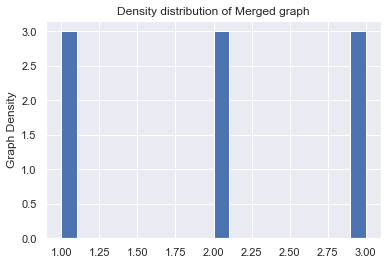

In [25]:
functionality_1(my_dict)